In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.loc[train.Age.isna(), 'Age'] = train[~train.Age.isna()].Age.mean()

In [10]:
train.loc[train.Cabin.isna(), 'Cabin'] = 'No Cabin'

In [11]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train.loc[train.Embarked.isna(),'Embarked'] = 'S'

In [13]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

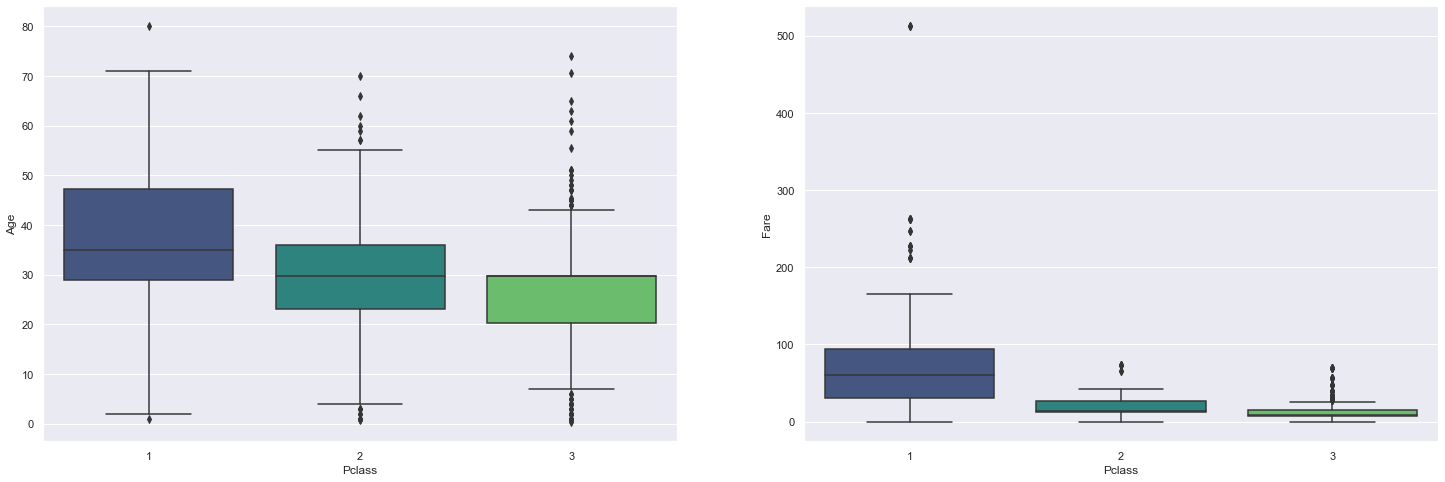

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(25,8))
sns.boxplot(x='Pclass', y='Age', data=train, palette='viridis', ax=axes[0])
sns.boxplot(x='Pclass', y='Fare', data=train, palette='viridis', ax=axes[1])
plt.show()

In [15]:
train.loc[train.Fare > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,No Cabin,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,No Cabin,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S


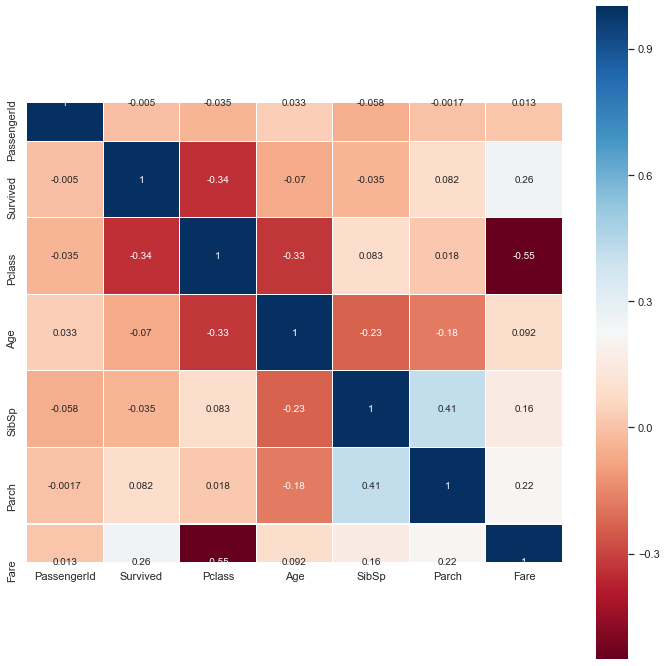

In [16]:
num_col = ['int64', 'float64']
plt.figure(figsize=(12,12))
sns.heatmap(train.select_dtypes(include=num_col).corr(),
           cmap=plt.cm.RdBu,
           vmax=1.0,
           linewidths=0.1,
           linecolor='white',
           square=True,
           annot=True)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 720x720 with 0 Axes>

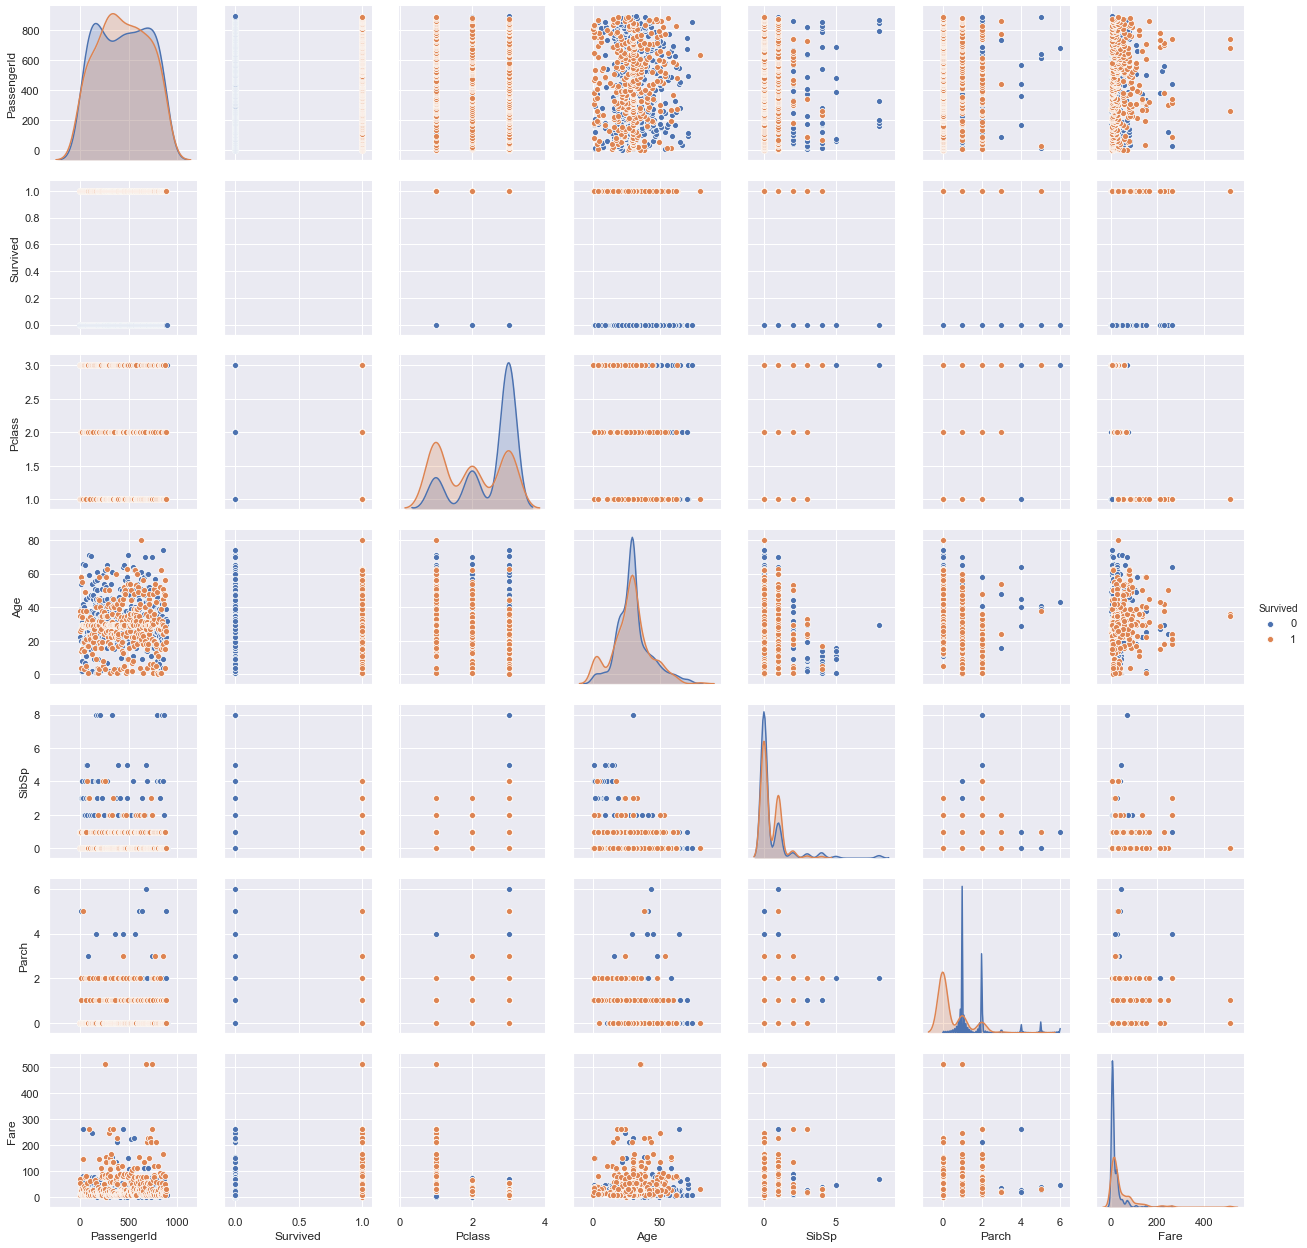

In [17]:
plt.figure(figsize=(10,10))
sns.pairplot(train.select_dtypes(include=num_col), hue='Survived')

In [18]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train['Sex'] = LE.fit_transform(train['Sex'])
train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

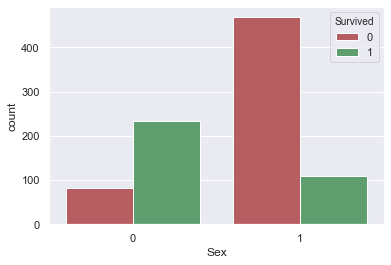

In [20]:
palette = {1:'g', 0:'r'}
sns.countplot(x='Sex', data=train, hue='Survived', palette=palette)

In [21]:
def features_engineering(df):
    df.loc[df.Age.isna(), 'Age'] = df[~df.Age.isna()].Age.mean()
    df.loc[df.Cabin.isna(), 'Cabin'] = 'No Cabin'
    df.loc[df.Embarked.isna(),'Embarked'] = 'S'
    df['persons_abroad_size'] = (df['Parch'] + df['SibSp']).astype(int)
    df['alone'] = np.where(df['Parch'] == 0,1,0)
    df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    df['Sex'] = df['Sex'].map({'male':1, 'female':2}).astype(int)
    df['log_fare'] = df['Fare'].apply(np.log)
    df['Room'] = (df['Cabin'].str.slice(1,5).str.extract('([0-9]+)', expand=False).fillna(0).astype(int))
    df['RoomBand'] = 0
    df.loc[(df.Room > 0) & (df.Room <= 20), 'RoomBand'] = 1
    df.loc[(df.Room > 20) & (df.Room <= 40), 'RoomBand'] = 2
    df.loc[(df.Room > 40) & (df.Room <= 80), 'RoomBand'] = 3
    df.loc[df.Room > 80, 'RoomBand'] = 4
    df_id = df.PassengerId
    df = df.drop('PassengerId', axis=1)
    return df, df_id

In [22]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
train, train_id = features_engineering(train)
test, test_id = features_engineering(test)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
Survived               891 non-null int64
Pclass                 891 non-null int64
Name                   891 non-null object
Sex                    891 non-null int64
Age                    891 non-null float64
SibSp                  891 non-null int64
Parch                  891 non-null int64
Ticket                 891 non-null object
Fare                   891 non-null float64
Cabin                  891 non-null object
Embarked               891 non-null int64
persons_abroad_size    891 non-null int64
alone                  891 non-null int64
log_fare               891 non-null float64
Room                   891 non-null int64
RoomBand               891 non-null int64
dtypes: float64(3), int64(10), object(3)
memory usage: 111.5+ KB


In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,persons_abroad_size,alone,log_fare,Room,RoomBand
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,No Cabin,0,1,1,1.981001,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1,1,1,4.266662,85,4
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,0,0,1,2.070022,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0,1,1,3.972177,123,4
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,No Cabin,0,0,1,2.085672,0,0


In [35]:
from xgboost import XGBClassifier, plot_importance
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [36]:
x_train = train.drop('Survived', axis=1).select_dtypes(include=['int32', 'int64', 'float64'])
y_train = train['Survived']
x_test = test.select_dtypes(include=['int32', 'int64', 'float64'])

xg_boost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.65, gamma=2,
                             learning_rate=0.3, max_delta_step=1, max_depth=4, min_child_weight=2, missing=None,
                            n_estimators=280, n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                            reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)

In [37]:
xg_boost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.65, gamma=2,
       learning_rate=0.3, max_delta_step=1, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=280, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=1)

In [38]:
xg_boost.score(x_train, y_train)

0.9012345679012346

In [39]:
scores = cross_val_score(xg_boost, x_train, y_train, cv=5, scoring='accuracy')
scores

array([0.81564246, 0.81564246, 0.84831461, 0.82022472, 0.83615819])

In [40]:
print('Kfold on XGBClassifier: %0.4f (+/- %0.4f)' % (scores.mean(), scores.std()))

Kfold on XGBClassifier: 0.8272 (+/- 0.0130)


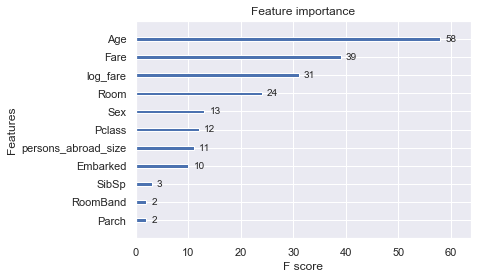

In [41]:
xgb.plot_importance(xg_boost)
plt.show()

In [43]:
y_pred = xg_boost.predict(x_test)

In [44]:
submission = pd.DataFrame({
    "PassengerId": test_id,
    "Survived": y_pred
})

In [45]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [46]:
submission.to_csv('submission.csv', index=False)

In [48]:
submission.Survived.value_counts()

0    292
1    126
Name: Survived, dtype: int64

In [49]:
submission.count()

PassengerId    418
Survived       418
dtype: int64